In [14]:
from pyod.models.auto_encoder import AutoEncoder
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from utils import *

In [2]:
X_train, X_test, y_train, y_test = data_generator(n_features=25)

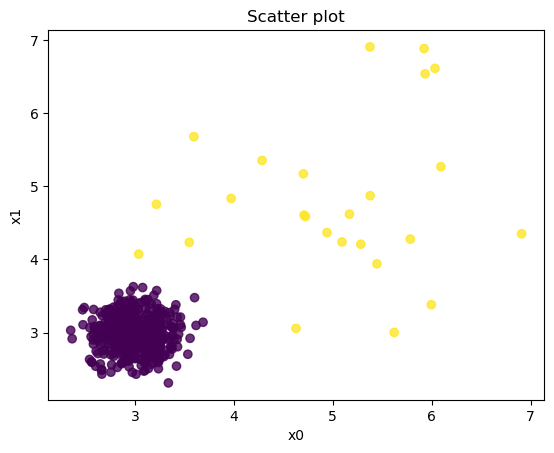

In [3]:
plot_data(X_train, y_train)

In [4]:
atcdr = AutoEncoder(contamination=0.05, hidden_neuron_list=[2, 2])
atcdr.fit(X_train);

Training: 100%|██████████| 10/10 [00:00<00:00, 32.86it/s]


In [5]:
# Training data
y_train_scores = atcdr.decision_function(X_train)
y_train_pred = atcdr.predict(X_train)

# Test data
y_test_scores = atcdr.decision_function(X_test)
y_test_pred = atcdr.predict(X_test) # outlier labels (0 or 1)

In [6]:
# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , atcdr.threshold_)

The threshold for the defined contamination rate: 4.433617


In [7]:
print("The training data:", count_stat(y_train_pred))
print("The test data:", count_stat(y_test_pred))

The training data: {0: 475, 1: 25}
The test data: {0: 475, 1: 25}


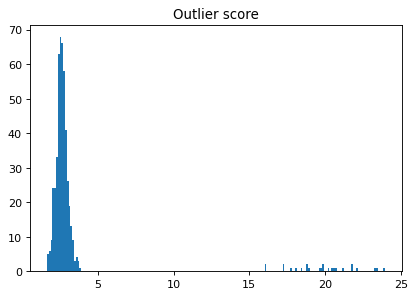

In [8]:
plt.figure(figsize=(6, 4), dpi=80)
plt.hist(y_train_scores, bins='auto')
plt.title("Outlier score")
plt.show()

In [9]:
threshold = atcdr.threshold_ # Or other value from the above histogram
feature_list = ['feature_01','feature_02','feature_03','feature_04','feature_05'
,'feature_06','feature_07','feature_08','feature_09','feature_10','feature_11'
,'feature_12','feature_13','feature_14','feature_15','feature_16','feature_17'
,'feature_18','feature_19','feature_20','feature_21','feature_22','feature_23'
,'feature_24','feature_25']

descriptive_stat_threshold(X_train, feature_list, y_train_scores, threshold).T

,0,1
Group,Normal,Outlier
Count,475,25
Count %,95.0,5.0
feature_01,2.99,5.02
feature_02,2.99,4.79
feature_03,2.98,5.05
feature_04,3.0,4.87
feature_05,3.0,4.99
feature_06,3.0,5.32
feature_07,3.0,4.8


In [10]:
descriptive_stat_threshold(X_test, feature_list, y_test_scores, threshold).T

,0,1
Group,Normal,Outlier
Count,475,25
Count %,95.0,5.0
feature_01,3.0,5.22
feature_02,3.02,5.45
feature_03,2.98,4.96
feature_04,2.99,5.26
feature_05,3.01,5.34
feature_06,2.99,5.14
feature_07,3.01,4.88


In [12]:
confusion_matrix2(y_train, y_train_pred)

Pred,0,1
Actual,,
0.0,475,0
1.0,0,25


In [13]:
confusion_matrix2(y_test, y_test_pred)

Pred,0,1
Actual,,
0.0,475,0
1.0,0,25


In [15]:
atcdr1 = AutoEncoder(contamination=0.05, hidden_neuron_list =[2, 2])
atcdr2 = AutoEncoder(contamination=0.05, hidden_neuron_list =[10, 2, 10])
atcdr3 = AutoEncoder(contamination=0.05, hidden_neuron_list =[15, 10, 2, 10, 15])

In [16]:
# Just prepare data frames so we can store the model results. There are three models.
train_scores = np.zeros([X_train.shape[0], 3])
test_scores = np.zeros([X_test.shape[0], 3])
atcdr1.fit(X_train)
atcdr2.fit(X_train)
atcdr3.fit(X_train)

Training: 100%|██████████| 10/10 [00:00<00:00, 13.79it/s]


In [17]:
# Store the results in each column:
train_scores[:, 0] = atcdr1.decision_function(X_train)
train_scores[:, 1] = atcdr2.decision_function(X_train)
train_scores[:, 2] = atcdr3.decision_function(X_train)
test_scores[:, 0] = atcdr1.decision_function(X_test)
test_scores[:, 1] = atcdr2.decision_function(X_test)
test_scores[:, 2] = atcdr3.decision_function(X_test)

In [18]:
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

In [19]:
y_train_by_average = average(train_scores_norm)
y_test_by_average = average(test_scores_norm)

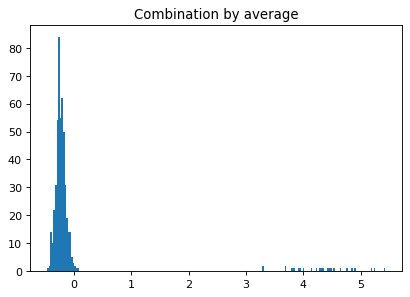

In [20]:
plt.figure(figsize=(6, 4), dpi=80)
plt.hist(y_train_by_average, bins='auto')
plt.title("Combination by average")
plt.show()

In [27]:
descriptive_stat_threshold(X_train, feature_list, y_train_by_average, 0.2).T

,0,1
Group,Normal,Outlier
Count,475,25
Count %,95.0,5.0
feature_01,2.99,5.02
feature_02,2.99,4.79
feature_03,2.98,5.05
feature_04,3.0,4.87
feature_05,3.0,4.99
feature_06,3.0,5.32
feature_07,3.0,4.8


In [26]:
descriptive_stat_threshold(X_test, feature_list, y_test_by_average, 0.2).T

,0,1
Group,Normal,Outlier
Count,475,25
Count %,95.0,5.0
feature_01,3.0,5.22
feature_02,3.02,5.45
feature_03,2.98,4.96
feature_04,2.99,5.26
feature_05,3.01,5.34
feature_06,2.99,5.14
feature_07,3.01,4.88
